In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Plan


1. We can narrow down the list of companies by filtering out those with many missing values in the ycharts operating margin dataset.
1. Next, we can use the yfinance python library to check which of the remaining companies have stock prices available in the yfinance dataset.
1. Finally, we can use ycharts to obtain the turnover for the companies that passed both filters.


In [22]:
ychopmdf = pd.read_excel(
    "data/ycharts_opm/ycharts_operating_margins_dropped.xlsx",
    index_col=0,
    parse_dates=True,
)
# Filter by April, because it's when I compose portfolios
ychopmdf.query("index.dt.month == 4", inplace=True)

ychopmdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2009-04-01 to 2022-04-01
Columns: 16383 entries, A.H.V to SEKYF
dtypes: float64(16383)
memory usage: 1.8 MB


In [24]:
ychopmdf.tail(3)


,A.H.V,A,AA,AAA.P.V,AAAJ.P.V,AAALF,AAALY,AAB.TO,AABB,AAC.P.V,...,SEHKF,SEHLF,SEI.V,SEIBF,SEIC,SEIGF,SEIGY,SEKEF,SEKEY,SEKYF
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,15.13,3.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.11,NaN,3.91,27.03,6.27,6.27,3.86,3.86,7.66
2021-04-01,NaN,19.68,10.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.16,NaN,-7.54,28.01,30.12,30.12,6.38,6.38,9.30
2022-04-01,NaN,22.48,20.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.86,NaN,2.66,30.01,-31.51,-31.51,8.88,8.88,4.45


In [41]:
# columns which contain less then `thresh` missing values are removed
ychopmdf.dropna(axis=1, thresh=12).shape[1]


4842

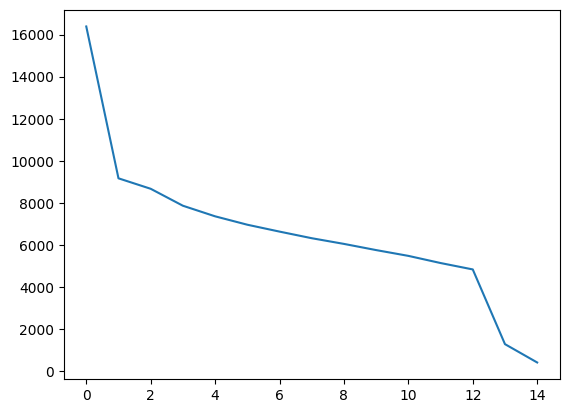

In [42]:
remains = [ychopmdf.dropna(axis=1, thresh=i).shape[1] for i in range(15)]
plt.plot(remains)
